# Comparison Loss Function and Validation Score

1) Import der einzelnen Libraries. Sortieren der Daten nach der Zielkategorie für den ersten Überblick.
2) Aufteilen der Trainings- und Testdaten. Erstellen von notwendigen Listen
3) Erstellen von Funktionen 
4) initialisieren der einzelnen MLPClassifier Netze 
5) Ergebnisse: Textuelle Daten, geplottete Vergleiche, prozentuale Heatmaps und Reports

## imports and data

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, balanced_accuracy_score, roc_auc_score, top_k_accuracy_score, cohen_kappa_score, matthews_corrcoef, hinge_loss
from sklearn.metrics import plot_confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import RocCurveDisplay, accuracy_score, recall_score, precision_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
import seaborn as sns
import numpy as np
import pandas as pd
import time
covertype = fetch_covtype()
forest = fetch_covtype(as_frame=True)
covertype.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [2]:
forest.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [3]:
forestlist = forest.frame
forestlistFiltered = forestlist.filter(items=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Cover_Type'])

In [4]:
forestlist = forest.frame
forestlistSorted = forestlist.sort_values(by='Cover_Type')
forestlistSorted

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
290505,2928.0,58.0,7.0,150.0,-7.0,1836.0,226.0,225.0,133.0,190.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532739,3015.0,343.0,18.0,376.0,50.0,3378.0,181.0,211.0,166.0,1982.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532740,3018.0,341.0,18.0,350.0,53.0,3398.0,180.0,211.0,168.0,2005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532741,3021.0,345.0,18.0,324.0,45.0,3419.0,182.0,209.0,164.0,2029.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
532742,3023.0,349.0,19.0,300.0,47.0,3439.0,182.0,206.0,160.0,2052.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399826,3334.0,356.0,10.0,558.0,100.0,765.0,204.0,223.0,156.0,1642.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399825,3333.0,6.0,7.0,601.0,99.0,806.0,212.0,226.0,152.0,1583.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399824,3334.0,3.0,5.0,601.0,39.0,845.0,214.0,231.0,155.0,1524.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
399812,3331.0,246.0,3.0,660.0,117.0,859.0,213.0,241.0,166.0,1113.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


## training and test data

In [5]:
covertype['data'].shape

(581012, 54)

In [6]:
X_c = covertype['data']
y_c = covertype['target']

In [7]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c)
print(X_train_c.shape) 
print(X_test_c.shape)

(435759, 54)
(145253, 54)


In [8]:
scaler_c = StandardScaler()
# Fit only to the training data
scaler_c.fit(X_train_c)

StandardScaler()

In [9]:
X_train_c = scaler_c.transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

In [10]:
classificationList = []
curve = []
validation = []
iteration = []

accuracyList = []
recallList = []
precisionList = []
timeList = []

## functions

In [11]:
def plotData():
    fig, axes = plt.subplots(3,2)
    sns.histplot(data=forestlistSorted, x="Elevation", color="skyblue", label="Elevation", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Aspect", color="red", label="Aspect", kde=True, ax=axes[0,0])
    sns.histplot(data=forestlistSorted, x="Slope", color="orange", label="Slope", kde=True, ax=axes[0,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Hydrology", color="skyblue", label="Horizontal_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Vertical_Distance_To_Hydrology", color="red", label="Vertical_Distance_To_Hydrology", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Roadways", color="orange", label="Horizontal_Distance_To_Roadways", kde=True, ax=axes[0,1])
    sns.histplot(data=forestlistSorted, x="Horizontal_Distance_To_Fire_Points", color="green", label="Horizontal_Distance_To_Fire_Points", kde=True, ax=axes[0,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Hillshade_9am", color="skyblue", label="Hillshade_9am", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_Noon", color="red", label="Hillshade_Noon", kde=True, ax=axes[1,0])
    sns.histplot(data=forestlistSorted, x="Hillshade_3pm", color="orange", label="Hillshade_3pm", kde=True, ax=axes[1,0])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Soil_Type_31", color="skyblue", label="Soil_Type_31", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_32", color="red", label="Soil_Type_32", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_33", color="orange", label="Soil_Type_33", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_34", color="cyan", label="Soil_Type_34", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_35", color="darkgreen", label="Soil_Type_35", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_36", color="gold", label="Soil_Type_36", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_37", color="purple", label="Soil_Type_37", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_38", color="silver", label="Soil_Type_38", kde=True, ax=axes[1,1])
    sns.histplot(data=forestlistSorted, x="Soil_Type_39", color="navy", label="Soil_Type_39", kde=True, ax=axes[1,1])
    plt.legend() 

    sns.histplot(data=forestlistSorted, x="Cover_Type", color="orange", label="Cover_Type",  ax=axes[2,1], discrete=True, kde=False)
    plt.legend() 
    fig.tight_layout()

In [12]:
def addToList(mlp, liste):
    liste.append(mlp)

In [13]:
def removeFromList(mlp, liste):
    liste.remove(mlp)

In [14]:
def fitWithTime(mpl):
    begin = time.time()
    mlptrain = mpl.fit(X_train_c,y_train_c)
    end = time.time()
    timestamp = end-begin
    timeList.append(timestamp)
    addToList(mlptrain, classificationList)
    print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))

In [15]:
def comparison(List):
    for mlp in List:
        print(mlp)
        print('\nparamters: ' + str(mlp.get_params(deep=True)))
        print('\nlast loss: ' + str(mlp.loss_))
        print('\nnumber of features seen during fit: ' + str(mlp.n_features_in_))
        print('\nnumber of layers: ' + str(mlp.n_layers_))
        print('\nnumber of outputs: ' + str(mlp.n_outputs_))
        print('\nname of output activation function: ' + str(mlp.out_activation_) )
        print('\nnumber of iterations: ' +str(mlp.n_iter_) )
        print('\nnumber training samples seen by the solver during fitting: ' +str(mlp.t_) )
        print('****************************************************************************************')

In [16]:
def curveValidateIteration(List, c, v, i):
    for mlp in List:
        c.append(mlp.loss_curve_)
        v.append(mlp.validation_scores_)
        i.append(np.arange(1, mlp.n_iter_+1))

__________________________________________________________________________________________________________________________________

In [17]:
cmap = ListedColormap(["coral", "azure", "indigo", "darkgreen", "lightblue", "crimson", "gold", "silver", "teal"])
def plotCurvePerInteration(List, curvy, iterate):
    print('default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE')
    print('Alle Infos, die davon abweichen, werden in der Legende gelistet')
    print('****************************************************************************************')
    for i,c,cl in zip(iterate, curvy, List):
        plt.scatter(i,c, marker = '.', label = str(cl))
    plt.title('Losscurve per iteration')
    plt.xlabel("iteration")
    plt.ylabel("loss curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [18]:
def plotValidationPerInteration(List, validate, iterate):
    for i,v, cl in zip(iterate, validate, List):
        plt.scatter(i,v, marker = '.', label = str(cl))
    plt.title('Validation per iteration')
    plt.xlabel("iteration")
    plt.ylabel("validation")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

In [19]:
def plotValidationPercurve(List, validate, curvy):
    for c,v,cl in zip(validate, curvy, List):
        plt.scatter(c,v, marker = '.', label = str(cl))
    plt.title('Validation per curve')
    plt.xlabel("validation")
    plt.ylabel("curve")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()


__________________________________________________________________________________________________________________________________

In [20]:
def heatmaping(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)   
        con_ma = confusion_matrix(y_test_c,predictions)
        con_ma_perc = np.empty([7, 7], dtype=float)

        for i in range(0, 7):
            number = 0.0
            for j in range(0, 7):
                number += con_ma[i][j]
            for j in range(0, 7):
                con_ma_perc[i][j] = 100/number*con_ma[i][j]

        tree = ['Spruce', 'Lodgepole Pine', 'PoderosaPine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

        # ======== Plot confuse matrix prozentual ========

        ay = sns.heatmap(con_ma_perc, annot=True, cmap='coolwarm', yticklabels=tree, xticklabels=tree, fmt='.2f', vmin=0, vmax=100)
        ay.xaxis.tick_top()
        ay.xaxis.set_label_position('top')
        plt.xticks(rotation=90)
        ay.set(title="Confusion Matrix - Recall",
              xlabel="- Predicted Tree -",
              ylabel="- Actual Tree -")
        plt.show()

In [21]:
def reporting(List):
    for mlp in List:
        print(mlp)
        predictions = mlp.predict(X_test_c)
        print(classification_report(y_test_c,predictions))

In [22]:
def accuracyPlotting(List):
        for mlp in List:
            print(mlp)
            predictions = mlp.predict(X_test_c)
            accuracy = accuracy_score(y_test_c, predictions)
            recall = recall_score(y_test_c, predictions, average = 'weighted')
            precision = precision_score(y_test_c, predictions, average = 'weighted')
            
            addToList(accuracy, accuracyList)
            addToList(recall, recallList)
            addToList(precision, precisionList)
            
            print('Accuracy: \t{0:.2f}'.format(accuracy * 100.0))
            print('Recall: \t{0:.2f}'.format(recall * 100.0))
            print('precision: \t{0:.2f}'.format(precision * 100.0))

In [23]:
def getTimeofMLP(List):
    for mlp, t in zip(List,timeList):
        print(mlp,t/60)

## initializing nets

#### tanh
<li> Aktivierungsfunktion: hyperbolic Tangens Function </li>
<li> Berechnung: $f(x) = tanh(x)$ </li>
<li> Andere Schreibweise: $f(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$</li>
<li> Werte von -1 bis 1 </li>

### Learningrate = invscaling
<li>invscaling: $effectiveLearningRate = \frac{learningRateInit}{t^power_t}$ $$invs = \frac{learningRateInit}{t^{0.5}}$$</li>
<li> Parameter zum Gradientenabstieg </li>

### Solver = Adam
<li> Stochastic Gradient Descent: Implementierung nach jedem Datensatz </li>
<li> Kombination aus zwei Erweiterungen: Adaptive Gradient Algorithm + Root Mean Square Propagation   </li>
<li> dadurch passt sich Lernrate an und beschleuningt den Abstieg des Gradienten </li>
<li> "Adaptive Moment Estimation: $$m_t = \beta_1 * m_{t-1} * (1- \beta_1) * \nabla w_t $$  $$v_t = \beta_2 * v_{t-1} * (1- \beta_2) * \nabla (w_t)^2 $$ $$\widehat{m}_t = \frac{m_t}{1-\beta_1^t}$$ $$\widehat{v}_t = \frac{v_t}{1-\beta_2^t}$$ $$ w_{t+1} = w_t - \frac{\eta}{sqrt(\widehat{v}_t+ \epsilon)}* \widehat{w}_t$$ </li>

#### Parameter
<li> alpha: Schrittgröße/Lernrate: $0.0001$ </li>
<li> beta1: Exponetielle Zerfallsrate des ersten Impulses </li>
<li> beta2: Exponetielle Zerfallsrate des zweiten Impulses </li>
<li> epsilon: Um nicht durch 0 zu teilen </li>

##### beta_1
<li>exponentielle Zerfallrate der Ersten-Moments-Schätzung</li>
<li>Zwischen $[0,1)$</li>
<li>Wert: $0.9$ </li>

##### beta_2
<li>exponentielle Zerfallrate der Zweiten-Moments-Schätzung</li>
<li>Zwischen $[0,1)$</li>
<li>Wert: $0.9$ </li>

##### Epsilon
<li>Wert für die numerische Stabilität in Adam</li>
<li>Vermeidet eine Division durch 0</li>
<li>Default-Wert: $1e-06$ </li>

### Softmax
<li> Aktivierungsfunktion des Outputlayers </li>
$e^{T_k}*(\sum_{l=1} ^{K} e^{T_l})^{-1}$

In [27]:
mlp_1 = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 350, beta_1 = 0.9, beta_2 = 0.9, epsilon= 1e-06, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'tanh', solver = "adam")
begin = time.time()
mlp_1_train = mlp_1.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_1_train, classificationList)

Iteration 1, loss = 0.67635071
Validation score: 0.752639
Iteration 2, loss = 0.55644265
Validation score: 0.768451
Iteration 3, loss = 0.52228192
Validation score: 0.784124
Iteration 4, loss = 0.50041453
Validation score: 0.792478
Iteration 5, loss = 0.48350492
Validation score: 0.797595
Iteration 6, loss = 0.47117977
Validation score: 0.804916
Iteration 7, loss = 0.46056726
Validation score: 0.811984
Iteration 8, loss = 0.45150548
Validation score: 0.815219
Iteration 9, loss = 0.44323984
Validation score: 0.818019
Iteration 10, loss = 0.43594213
Validation score: 0.822655
Iteration 11, loss = 0.42987723
Validation score: 0.824582
Iteration 12, loss = 0.42494962
Validation score: 0.825408
Iteration 13, loss = 0.42090064
Validation score: 0.826694
Iteration 14, loss = 0.41705763
Validation score: 0.829264
Iteration 15, loss = 0.41403200
Validation score: 0.831559
Iteration 16, loss = 0.41172011
Validation score: 0.830618
Iteration 17, loss = 0.40920620
Validation score: 0.833027
Iterat

In [36]:
mlp_2 = MLPClassifier(hidden_layer_sizes=(70,70,70), max_iter = 350, beta_1 = 0.9, beta_2 = 0.9, epsilon= 1e-06, early_stopping = True, verbose = True, learning_rate = "invscaling", activation = 'tanh', solver = "adam")
begin = time.time()
mlp_2_train = mlp_2.fit(X_train_c,y_train_c)
end = time.time()
timestamp = end-begin
timeList.append(timestamp)
print('Zeit in Sekunden: \t{0:.2f}'.format(timestamp))
addToList(mlp_2_train, classificationList)

Iteration 1, loss = 0.59319445
Validation score: 0.785295
Iteration 2, loss = 0.46704046
Validation score: 0.817170
Iteration 3, loss = 0.40765351
Validation score: 0.837158
Iteration 4, loss = 0.36657971
Validation score: 0.856113
Iteration 5, loss = 0.33700740
Validation score: 0.865683
Iteration 6, loss = 0.31390293
Validation score: 0.876262
Iteration 7, loss = 0.29582345
Validation score: 0.881770
Iteration 8, loss = 0.28026685
Validation score: 0.887599
Iteration 9, loss = 0.26723907
Validation score: 0.894552
Iteration 10, loss = 0.25616244
Validation score: 0.896962
Iteration 11, loss = 0.24661088
Validation score: 0.899922
Iteration 12, loss = 0.23839486
Validation score: 0.900955
Iteration 13, loss = 0.23136469
Validation score: 0.905338
Iteration 14, loss = 0.22483829
Validation score: 0.907908
Iteration 15, loss = 0.22029824
Validation score: 0.909882
Iteration 16, loss = 0.21502917
Validation score: 0.913989
Iteration 17, loss = 0.21086896
Validation score: 0.915848
Iterat

In [37]:
getTimeofMLP(classificationList)

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True) 12.607451768716176
MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True) 57.944978074232736


In [38]:
classificationList

[MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
               hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
               max_iter=350, verbose=True),
 MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
               hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
               max_iter=350, verbose=True)]

__________________________________________________________________________________________________________________________________

## Results

In [39]:
comparison(classificationList)

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)

paramters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.9, 'early_stopping': True, 'epsilon': 1e-06, 'hidden_layer_sizes': (20, 20, 20), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 350, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': True, 'warm_start': False}

last loss: 3.699877917671539e-01

number of features seen during fit: 54

number of layers: 5

number of outputs: 7

name of output activation function: softmax

number of iterations: 51

number training samples seen by the solver during fitting: 20001333
*********************************************

default: hidden_layer = (100,), activation = relu, solver = adam, alpha = 0.0001, learning_rate = constant, learning_rate_init = 0.001, max_iter = 200, shuffle = true, early_stopping & warm_start = FALSE
Alle Infos, die davon abweichen, werden in der Legende gelistet
****************************************************************************************


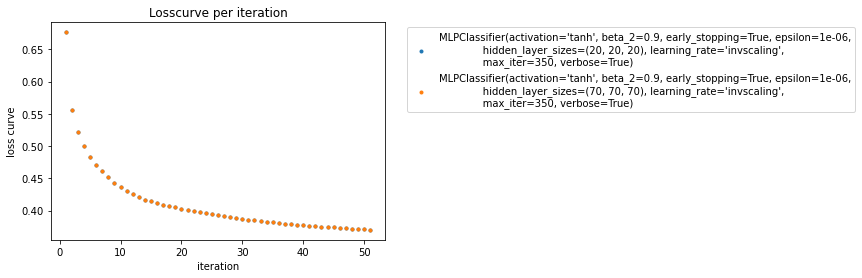

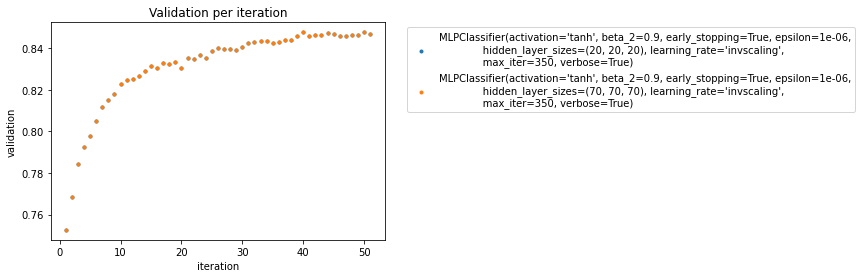

In [40]:
curveValidateIteration(classificationList, curve, validation, iteration)
plotCurvePerInteration(classificationList, curve, iteration)
plotValidationPerInteration(classificationList, validation, iteration)

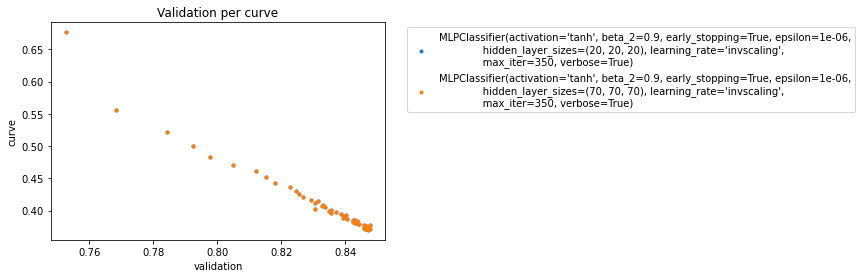

In [41]:
plotValidationPercurve(classificationList, validation, curve)

## Heatmaps

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)


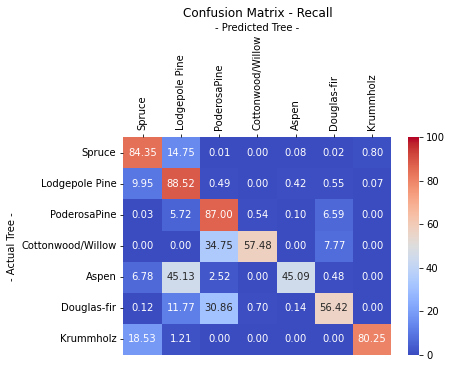

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)


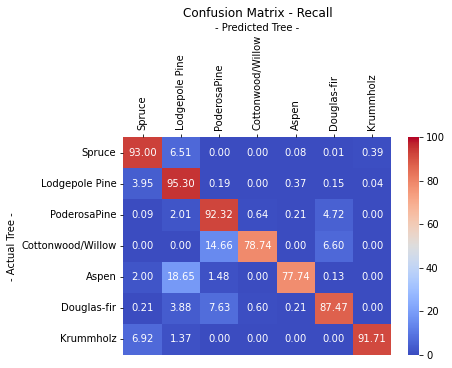

In [42]:
heatmaping(classificationList)

In [43]:
reporting(classificationList)

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
              precision    recall  f1-score   support

           1       0.85      0.84      0.84     53246
           2       0.86      0.89      0.87     70780
           3       0.80      0.87      0.83      8841
           4       0.83      0.57      0.68       682
           5       0.75      0.45      0.56      2300
           6       0.70      0.56      0.62      4300
           7       0.90      0.80      0.85      5104

    accuracy                           0.85    145253
   macro avg       0.81      0.71      0.75    145253
weighted avg       0.85      0.85      0.85    145253

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)
       

In [44]:
accuracyPlotting(classificationList)

MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(20, 20, 20), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	84.82
Recall: 	84.82
precision: 	84.70
MLPClassifier(activation='tanh', beta_2=0.9, early_stopping=True, epsilon=1e-06,
              hidden_layer_sizes=(70, 70, 70), learning_rate='invscaling',
              max_iter=350, verbose=True)
Accuracy: 	93.56
Recall: 	93.56
precision: 	93.55


## Fazit
<li> </li>
<li>  </li>
<li>  </li>